In this notebook we will implement a toy neural network in 2 dimensions. First we will implemetn a linear classifier and eventually  extend the code into a 2d neural network with few changes.

## Generating data

In [153]:
import numpy as np
import matplotlib.pyplot as plt

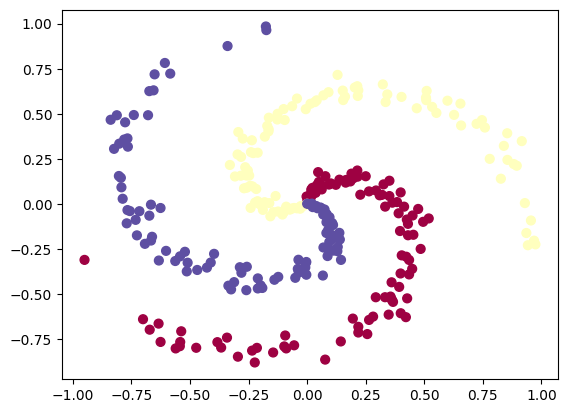

In [154]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

this data consists of 3 classes that are not linearly separable.

## Preprocessing
We want our data to be zero mean and having unit standard deviation. But in this case features are already in a nice range -1 to 1. So skip this step.

### Training a Softmax Linear Classifier

In [155]:
# Initialize parameters
W = 0.01 * np.random.randn(K,D)
b = np.zeros((1,K))

### Compute the class scores

In [156]:
#class scores
scores=np.dot(X,W.T)+b
scores.shape

(300, 3)

**dimensions**

- X=(300,2) --> (num_examples ,num_features)
- W=(num_labels,num_features)
- b=(1,num_classes)
- scores=(300,3), each row gives class scores for three classes

### Compute the loss

we will use softmax classifer . Therefore cost func we will use here is cross entropy loss.
$L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right)$

**Intuition**
- the probability of correct class lies between 0 and 1.
- if prob is higher, negative log prob is lower. Conversely prob lower, negative log prob is higher.

We will also consider regularized loss term in the loss function.$L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \frac{1}{2} \lambda \sum_k\sum_l W_{k,l}^2 }_\text{regularization loss} \\\\$

In [157]:
# softmax funciton
def softmax(x):  # here x =scores
    nu=np.exp(x)
    den=np.sum(nu,axis=1,keepdims=True)
    return nu/den

In [158]:
prob_scores=softmax(scores)
print(prob_scores[0,:5])

[0.33333333 0.33333333 0.33333333]


prob_scores=(300,3) matirx . each row respresents class probability of three classes correspondig to the training example denoted by that row. Hence the sum of each row of prob_score should be 1. Since sum of all prob is 1. Let's check if we are correct

In [159]:
print(np.sum(prob_scores,axis=1))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Calculating log probabilities** of each correct class. In other words we will consider only probabilities of the correct class. This will be a 1-D array of shape (300,).

In [160]:
correct_log_probs=-np.log(prob_scores[range(X.shape[0]),y])

Computing the loss


In [161]:
reg=.4
data_loss=np.sum(correct_log_probs)/X.shape[0]
reg_loss=reg*np.sum(W*W)
loss=data_loss+reg_loss

In [162]:
print(loss)

1.0967535396390593


**note**: here loss is about 1.1 which equivalent to -np.log(1.0/3) .Because with small initial random weights all probabilities assigned to all classes are about one third.

***Goal*** : minimizes loss nearly zero

### Computing the Analytic Gradient with Backpropagation
If P is a vector of normalized probabilities. The loss for one example is,

$p_k = \frac{e^{f_k}}{ \sum_j e^{f_j} } \hspace{1in} L_i =-\log\left(p_{y_i}\right)$

We want to understand how computed scores inside f should change to decrease the loss $L_i$. Well gradient which refers to change of depent variable w.r.t. independent variable. To put it another way how the dependet variable changes if independent variable changes. We want our loss function to decrease. So we need to find the realtion of changing characteristics of loss function w.r.t. its parameters. That is why we will calculate gradient of loss function, 
$\partial L_i / \partial f_k$. Moreover, its clear that if gradient is negative then we can say that they are negatively correlated which turns out that with the increase of independent variable dependent will decrease and vice vera. In our example $L_i$ is computed from P,which depends on f. After applying chain rule finally we have,
$\frac{\partial L_i }{ \partial f_k } = p_k - \mathbb{1}(y_i = k)$

In [163]:
dscores=prob_scores
dscores[range(X.shape[0]),y]-=1
dscores/=X.shape[0]

Well dscores holds the gradients on the scores. and scores=np.dot(X,W)+b. So using the gradients on scores we will backpropagate to find dw,db

Note: gradient on regualarization term $\frac{d}{dw} ( \frac{1}{2} \lambda w^2) = \lambda w$

In [164]:
X.shape

(300, 2)

In [165]:
dscores.shape

(300, 3)

In [166]:
dW=np.dot(X.T,dscores)
db=np.sum(dscores,axis=0,keepdims=True)
dW=dW.T+reg*W

### Performing a parameter update
Now we know how every parameter influences the loss function. We will now  perform parameter update to the negative direction of the gradient to decrease the loss.

In [167]:
## parameter update
learn_rate=.01
W+=-learn_rate*dW
b+=-learn_rate*db

# Putting it all together: Training a Softmax Classifier
putting all the components together here is the full python code for softmax classifier with gradient descent

In [168]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if (i+1) % 50 == 0:
    print ("iteration %d: loss %f" % (i+1, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 50: loss 0.780198
iteration 100: loss 0.766646
iteration 150: loss 0.764870
iteration 200: loss 0.764559


Now we will evaluate training set accuracy

In [169]:
scores=np.dot(X,W)+b
predicted_class=np.argmax(scores,axis=1)
print(f"accuracy on training set {np.mean(predicted_class==y)*100:.2f}%")

accuracy on training set 51.67%


here argmax funtion returns the **index** of maximum value of each row (prediction for each example). That means predicted_class is of shape(num_examples,) which is here for our example (300,).

The accuracy on trining set is not that good since we used linear classifier for data that is not linearly separable.
We can see this in a diagram

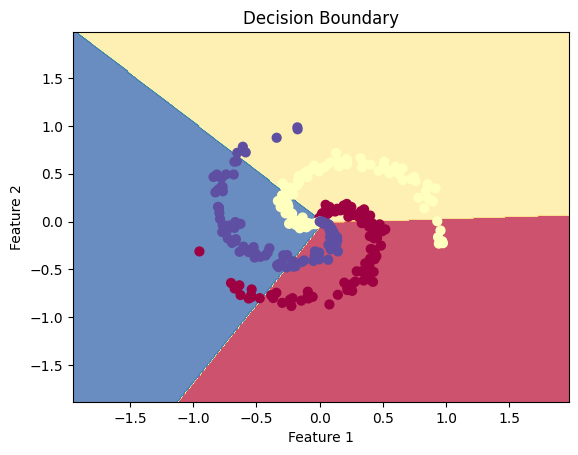

In [170]:

# Define the function to plot the decision boundary
def plot_decision_boundary(X, y, W, b):
    # Set min and max values and give some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # Step size in the mesh

    # Generate a grid of points with a step size h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point on the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    scores = np.dot(grid_points, W) + b
    predicted_class = np.argmax(scores, axis=1)

    # Reshape the predicted class into a grid
    predicted_class = predicted_class.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, predicted_class, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Assuming 'scores', 'X', 'y' are defined as in the code provided
plot_decision_boundary(X, y, W, b)


# Training Neural Network
We have seen that the linear classifier is not abundant to predict our toy data. Therefore we will use Neural Network (2layer for our purpose) to classify this non linear data. Since we will use one hidden layer. We will need two sets of parameters for hidden layer and output layer

In [171]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if (i+1) %2000 == 0:
    print ("iteration %d: loss %f" % (i+1, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 2000: loss 0.249570
iteration 4000: loss 0.246530
iteration 6000: loss 0.246097
iteration 8000: loss 0.245894
iteration 10000: loss 0.245780


Let's find training accuracy now with this optimized parameter list from neural network

In [176]:
##find score
def predict(X,W,b,W2,b2):
    hidden_layer=np.maximum(0,np.dot(X,W)+b)
    scores=np.dot(hidden_layer,W2)+b2
    predicted_class=np.argmax(scores,axis=1)
    return predicted_class


In [177]:
pred_class=predict(X,W,b,W2,b2)
accuracy=np.mean(pred_class==y)
print(f"accuracy on training set using NN: {accuracy*100:.2f}")

accuracy on training set using NN: 99.00


This is fantastic result. Now let's see in the graph.

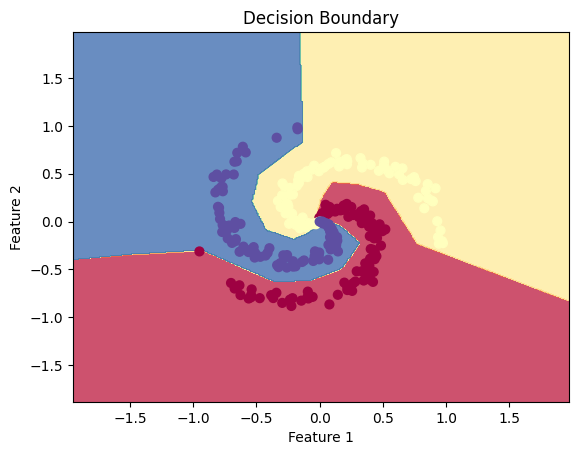

In [178]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions on the grid points
    Z = predict(grid_points, W1, b1, W2, b2)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot the decision boundary using the trained weights and biases
plot_decision_boundary(X, y, W, b, W2, b2)